In [45]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import model_selection
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
os.getcwd()

'C:\\Users\\anumeha\\Downloads'

In [46]:
#Loading given Iris Data
os.chdir("/Users/anumeha/Downloads/")
iris = pd.read_csv('data07_iris.csv')

In [47]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
Sepal.Length    100 non-null float64
Sepal.Width     100 non-null float64
Petal.Length    100 non-null float64
Petal.Width     100 non-null float64
Species         100 non-null int64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [48]:
array = iris.values
#Select which part of the table is input and which part is output
X = array[:,1:4]
y = array[:,4]

In [49]:
test_size = 0.40
seed = 0
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [50]:

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.775


In [125]:
from sklearn.model_selection import cross_validate
k_range = range(1, 40)
# We can create Python dictionary using [] or dict()
scores = []
# We use a loop through the range 1 to 40
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #scores.append(accuracy_score(y_test, y_pred))
    #scores.append(np.mean(y_pred))
    scoresw = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(scoresw.mean())
    #cverror = knn.fit(X_train, y_train).score(X_train, y_train)
    #cross_val_score(knn, X, y, scoring='recall_macro',cv=1-40)  
    #cv_results = np.array(cross_validate(knn.fit(X, y), X, y,scoring='recall_macro', cv=40))
print(scores)

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=0.

The optimal number of neighbors is 7


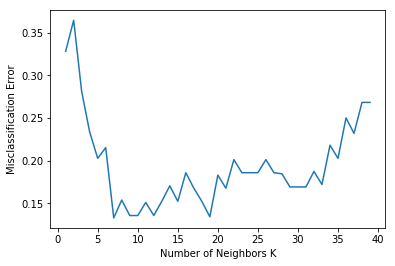

In [108]:
# changing to misclassification error
MSE = [1 - x for x in scores]

# determining best k
optimal_k = k_range[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(k_range, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [109]:
print(MSE)

[0.32832167832167836, 0.36468531468531473, 0.28088578088578087, 0.2334498834498835, 0.2026806526806526, 0.2152680652680653, 0.13275058275058282, 0.15372960372960376, 0.13554778554778557, 0.13554778554778557, 0.1509324009324009, 0.13554778554778557, 0.15221445221445218, 0.17039627039627037, 0.15221445221445218, 0.1857808857808857, 0.1675990675990675, 0.15221445221445218, 0.1340326340326341, 0.18298368298368284, 0.1675990675990675, 0.20116550116550103, 0.1857808857808857, 0.1857808857808857, 0.1857808857808857, 0.20116550116550103, 0.1857808857808857, 0.18449883449883442, 0.1691142191142191, 0.1691142191142191, 0.1691142191142191, 0.18729603729603728, 0.17191142191142195, 0.21806526806526816, 0.20268065268065272, 0.2501165501165501, 0.2319347319347319, 0.2682983682983683, 0.2682983682983683]


In [110]:
#plt.figure(figsize=(12, 6))  
#plt.plot(range(1, 40), cverror, color='red', linestyle='dashed', marker='o',  
#         markerfacecolor='blue', markersize=10)
#plt.title('Error Rate K Value')  
#plt.xlabel('K Value')  
#plt.ylabel('Mean Error')  

In [111]:
print('Length of list', len(scores))
print('Max of list', max(scores))

('Length of list', 39)
('Max of list', 0.8672494172494172)


In [112]:
#k_list = list(range(1,50,2))
#cv_scores = []

# perform 10-fold cross validation
#for k in k_list:
#    knn = KNeighborsClassifier(n_neighbors=k)
#    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#    cv_scores.append(scores.mean())

In [113]:
#MSE = [1 - x for x in cv_scores]
#
#plt.figure()
#plt.figure(figsize=(15,10))
#plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
#plt.xlabel('Number of Neighbors K', fontsize=15)
#plt.ylabel('Misclassification Error', fontsize=15)
#sns.set_style("whitegrid")
#plt.plot(k_list, MSE)

#plt.show()

In [114]:
optimal_k = k_range[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 7


In [115]:
testerror = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    testerror.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

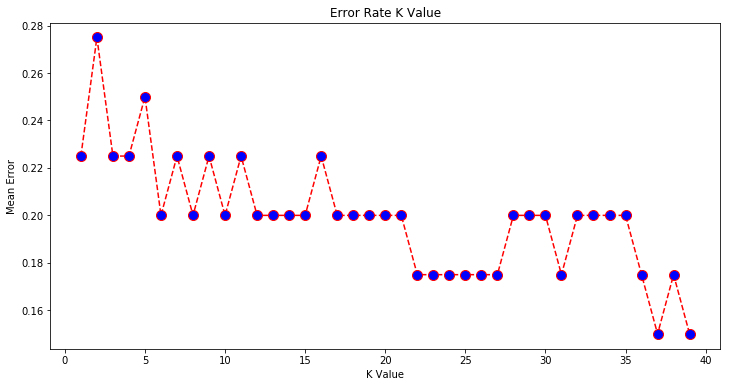

In [116]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), testerror, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [117]:
trainerror = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    trainerror.append(np.mean(pred_i != y_train))

Text(0,0.5,'Mean Error')

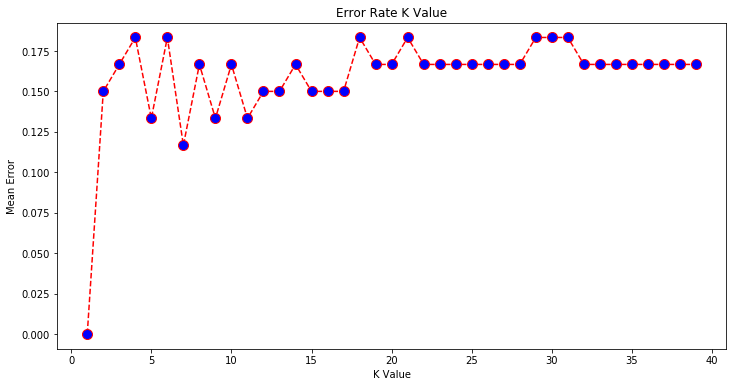

In [118]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), trainerror, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

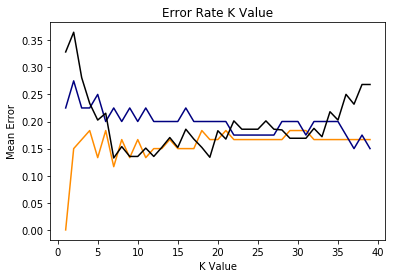

In [119]:
plt.plot(k_range, trainerror, color="darkorange")
plt.plot(k_range, testerror, color="navy")
plt.plot(k_range, MSE, color="black")
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
#plt.plot(k_range, testerror)
plt.show()

In [120]:
print(MSE)

[0.32832167832167836, 0.36468531468531473, 0.28088578088578087, 0.2334498834498835, 0.2026806526806526, 0.2152680652680653, 0.13275058275058282, 0.15372960372960376, 0.13554778554778557, 0.13554778554778557, 0.1509324009324009, 0.13554778554778557, 0.15221445221445218, 0.17039627039627037, 0.15221445221445218, 0.1857808857808857, 0.1675990675990675, 0.15221445221445218, 0.1340326340326341, 0.18298368298368284, 0.1675990675990675, 0.20116550116550103, 0.1857808857808857, 0.1857808857808857, 0.1857808857808857, 0.20116550116550103, 0.1857808857808857, 0.18449883449883442, 0.1691142191142191, 0.1691142191142191, 0.1691142191142191, 0.18729603729603728, 0.17191142191142195, 0.21806526806526816, 0.20268065268065272, 0.2501165501165501, 0.2319347319347319, 0.2682983682983683, 0.2682983682983683]


In [121]:
# Create range of values for parameter
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(KNeighborsClassifier(), 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=k, 
                                             scoring="accuracy")


ValueError: n_splits=39 cannot be greater than the number of members in each class.

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)